In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [127]:
kospi1 = pd.read_csv("./연결찐.csv", encoding = "euc-kr")
kospi2 = pd.read_csv("./개별찐.csv", encoding = "euc-kr")

In [128]:
st13 = pd.read_csv("./코스피주식(2013).csv", encoding = "euc-kr")
st14 = pd.read_csv("./코스피주식(2014).csv", encoding = "euc-kr")
st15 = pd.read_csv("./코스피주식(2015).csv", encoding = "euc-kr")
st16 = pd.read_csv("./코스피주식(2016).csv", encoding = "euc-kr")
st17 = pd.read_csv("./코스피주식(2017).csv", encoding = "euc-kr")
st18 = pd.read_csv("./코스피주식(2018).csv", encoding = "euc-kr")
st19 = pd.read_csv("./코스피주식(2019).csv", encoding = "euc-kr")
st20 = pd.read_csv("./코스피주식(2020).csv", encoding = "euc-kr")
st21 = pd.read_csv("./코스피주식(2021).csv", encoding = "euc-kr")
st22 = pd.read_csv("./코스피주식(2022).csv", encoding = "euc-kr")

In [129]:
kospi1.columns = ["회사명", "종목코드", "회계년도", "종가", 'PER(최고)', 'PER(최저)', 'PBR(최고)', 'PBR(최저)', 'PCR(최고)', 'PCR(최저)', 'PSR(최고)', 'PSR(최저)', '이익수익률', 'ROE', '자산', '당기순이익', '판관비']
kospi2.columns = ["회사명", "종목코드", "회계년도", "종가", 'PER(최고)', 'PER(최저)', 'PBR(최고)', 'PBR(최저)', 'PCR(최고)', 'PCR(최저)', 'PSR(최고)', 'PSR(최저)', '이익수익률', 'ROE', '자산', '당기순이익', '판관비']

In [130]:
st13['회계년도'] = '2013/12'
st14['회계년도'] = '2014/12'
st15['회계년도'] = '2015/12'
st16['회계년도'] = '2016/12'
st17['회계년도'] = '2017/12'
st18['회계년도'] = '2018/12'
st19['회계년도'] = '2019/12'
st20['회계년도'] = '2020/12'
st21['회계년도'] = '2021/12'
st22['회계년도'] = '2022/12'


In [131]:
df = pd.concat([st13, st14, st15, st16, st17, st18, st19, st20, st21, st22], axis=0)

In [132]:
kospi = kospi1.fillna(kospi2)

In [133]:
kospi['종목코드'] = kospi['종목코드'].astype(str).str.zfill(6)

In [134]:
kospi['회사명'] = kospi['회사명'].str.replace('(주)', '')

In [135]:
kospi = pd.merge(kospi, df[['종목코드', '회계년도', '상장주식수', '시가총액']], on=['종목코드', '회계년도'], how='left')

In [136]:
kospi

,회사명,종목코드,회계년도,종가,PER(최고),PER(최저),PBR(최고),PBR(최저),PCR(최고),PCR(최저),PSR(최고),PSR(최저),이익수익률,ROE,자산,당기순이익,판관비,상장주식수,시가총액
0,BNK금융지주,138930,2013/12,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193379899.0,3.094078e+12
1,BNK금융지주,138930,2014/12,14500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234379899.0,3.398509e+12
2,BNK금융지주,138930,2015/12,8420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255935246.0,2.154975e+12
3,BNK금융지주,138930,2016/12,8680.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325935246.0,2.829118e+12
4,BNK금융지주,138930,2017/12,9420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325935246.0,3.070310e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,효성티앤씨,298020,2018/12,185000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.138844e+09,3.149830e+07,130713422.0,4327682.0,8.006212e+11
1870,효성티앤씨,298020,2019/12,154500.0,423.44,295.52,2.36,1.64,6.03,4.21,0.22,0.16,6.57,20.86,3.224307e+09,1.220229e+08,240899527.0,4327682.0,6.686269e+11
1871,효성티앤씨,298020,2020/12,211000.0,15.27,5.21,2.05,0.70,4.83,1.65,0.30,0.10,9.64,25.10,2.824128e+09,1.682721e+08,231960469.0,4327682.0,9.131409e+11
1872,효성티앤씨,298020,2021/12,521000.0,15.10,3.23,7.86,1.68,20.38,4.36,0.91,0.20,6.67,76.22,4.526469e+09,1.007903e+09,275426084.0,4327682.0,2.254722e+12


In [137]:
# kospi['pbr'] = (kospi['종가']*kospi['상장주식수'])/(kospi['자산']-kospi['부채'])
# kospi['per'] = kospi['종가']/(kospi['당기순이익']/kospi['상장주식수'])
# kospi['pcr'] = kospi['종가']/(kospi['현금흐름']/kospi['상장주식수'])
# kospi['psr'] = kospi['종가']/(kospi['매출액']/kospi['상장주식수'])
# kospi['roe'] = kospi['당기순이익']/(kospi['자산']-kospi['부채'])
# kospi['roa'] = kospi['당기순이익']/kospi['자산']
# kospi['roic'] = kospi['당기순이익']/(kospi['자산']-kospi['비유동자산'])
# kospi['gpa'] = kospi['매출총이익']/kospi['자산']

In [138]:
# # 분자(EBIT)
# magic_ebit = kospi['당기순이익'] + kospi['법인세비용'] + kospi['이자비용']

# # 분모
# magic_cap = kospi['시가총액']
# magic_debt = kospi['부채']

# ## 분모: 여유자금
# magic_excess_cash = kospi['유동부채'] - kospi['유동자산'] + kospi[
#     '현금및현금성자산']
# magic_excess_cash[magic_excess_cash < 0] = 0
# magic_excess_cash_final = kospi['현금및현금성자산'] - magic_excess_cash

# magic_ev = magic_cap + magic_debt - magic_excess_cash_final

# # 이익수익률
# magic_ey = magic_ebit / magic_ev
# kospi['매직'] = magic_ey

In [139]:
kospi

,회사명,종목코드,회계년도,종가,PER(최고),PER(최저),PBR(최고),PBR(최저),PCR(최고),PCR(최저),PSR(최고),PSR(최저),이익수익률,ROE,자산,당기순이익,판관비,상장주식수,시가총액
0,BNK금융지주,138930,2013/12,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193379899.0,3.094078e+12
1,BNK금융지주,138930,2014/12,14500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234379899.0,3.398509e+12
2,BNK금융지주,138930,2015/12,8420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255935246.0,2.154975e+12
3,BNK금융지주,138930,2016/12,8680.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325935246.0,2.829118e+12
4,BNK금융지주,138930,2017/12,9420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325935246.0,3.070310e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,효성티앤씨,298020,2018/12,185000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.138844e+09,3.149830e+07,130713422.0,4327682.0,8.006212e+11
1870,효성티앤씨,298020,2019/12,154500.0,423.44,295.52,2.36,1.64,6.03,4.21,0.22,0.16,6.57,20.86,3.224307e+09,1.220229e+08,240899527.0,4327682.0,6.686269e+11
1871,효성티앤씨,298020,2020/12,211000.0,15.27,5.21,2.05,0.70,4.83,1.65,0.30,0.10,9.64,25.10,2.824128e+09,1.682721e+08,231960469.0,4327682.0,9.131409e+11
1872,효성티앤씨,298020,2021/12,521000.0,15.10,3.23,7.86,1.68,20.38,4.36,0.91,0.20,6.67,76.22,4.526469e+09,1.007903e+09,275426084.0,4327682.0,2.254722e+12


In [140]:
# 컬럼 값의 뒤에서 "/12"를 제거하는 함수
def remove_suffix(value):
    if isinstance(value, str) and value.endswith("/12"):
        return value[:-3]  # 마지막 세 글자 제거
    else:
        return value

# 모든 컬럼에 함수 적용
kospi = kospi.applymap(remove_suffix)

In [141]:
kospi = kospi.dropna()

In [142]:
len(kospi['회사명'].unique())

179

In [143]:
kospi.isna().sum()

회사명        0
종목코드       0
회계년도       0
종가         0
PER(최고)    0
PER(최저)    0
PBR(최고)    0
PBR(최저)    0
PCR(최고)    0
PCR(최저)    0
PSR(최고)    0
PSR(최저)    0
이익수익률      0
ROE        0
자산         0
당기순이익      0
판관비        0
상장주식수      0
시가총액       0
dtype: int64

In [144]:
kospi['수익률'] = (kospi['종가'] / kospi['종가'].shift(1) - 1) * 100
kospi.loc[kospi['회계년도'] == "2013/12"]

,회사명,종목코드,회계년도,종가,PER(최고),PER(최저),PBR(최고),PBR(최저),PCR(최고),PCR(최저),PSR(최고),PSR(최저),이익수익률,ROE,자산,당기순이익,판관비,상장주식수,시가총액,수익률


In [145]:
kospi

,회사명,종목코드,회계년도,종가,PER(최고),PER(최저),PBR(최고),PBR(최저),PCR(최고),PCR(최저),PSR(최고),PSR(최저),이익수익률,ROE,자산,당기순이익,판관비,상장주식수,시가총액,수익률
10,DB하이텍,000990,2013,7530.0,0.00,0.00,3.25,1.79,14.01,7.73,0.81,0.45,12.36,-33.51,1.058392e+09,-8.304677e+07,98861923.0,44367832.0,3.340898e+11,NaN
11,DB하이텍,000990,2014,4615.0,0.00,0.00,5.25,2.02,8.22,3.17,0.69,0.26,6.50,-47.32,9.848766e+08,-7.700884e+07,91344601.0,44367832.0,2.047575e+11,-38.711819
12,DB하이텍,000990,2015,14300.0,6.74,1.47,3.53,0.77,5.71,1.25,1.29,0.28,5.11,67.63,9.846437e+08,1.267334e+08,104710656.0,44367832.0,6.344600e+11,209.859155
13,DB하이텍,000990,2016,15900.0,10.60,5.92,2.75,1.54,3.78,2.11,1.21,0.67,4.06,29.65,9.867886e+08,8.834402e+07,117582311.0,44367832.0,7.054485e+11,11.188811
14,DB하이텍,000990,2017,12000.0,14.03,6.76,2.58,1.24,5.73,2.76,1.54,0.74,3.71,27.62,9.939507e+08,1.101751e+08,110371984.0,44367832.0,5.324140e+11,-24.528302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,효성첨단소재,298050,2022,333500.0,12.65,6.40,4.08,2.06,11.79,5.96,3.13,1.58,14.35,19.11,2.934713e+09,1.602384e+08,206941913.0,4479948.0,1.494063e+12,-44.043624
1870,효성티앤씨,298020,2019,154500.0,423.44,295.52,2.36,1.64,6.03,4.21,0.22,0.16,6.57,20.86,3.224307e+09,1.220229e+08,240899527.0,4327682.0,6.686269e+11,-53.673163
1871,효성티앤씨,298020,2020,211000.0,15.27,5.21,2.05,0.70,4.83,1.65,0.30,0.10,9.64,25.10,2.824128e+09,1.682721e+08,231960469.0,4327682.0,9.131409e+11,36.569579
1872,효성티앤씨,298020,2021,521000.0,15.10,3.23,7.86,1.68,20.38,4.36,0.91,0.20,6.67,76.22,4.526469e+09,1.007903e+09,275426084.0,4327682.0,2.254722e+12,146.919431


In [146]:
kospi["PER"] = (kospi["PER(최고)"] + kospi["PER(최저)"])/2
kospi["PBR"] = (kospi["PBR(최고)"] + kospi["PBR(최저)"])/2
kospi["PCR"] = (kospi["PCR(최고)"] + kospi["PCR(최저)"])/2
kospi["PSR"] = (kospi["PSR(최고)"] + kospi["PSR(최저)"])/2
kospi.drop(["PER(최고)", "PER(최저)", "PBR(최고)", "PBR(최저)", "PCR(최고)", "PCR(최저)", "PSR(최고)", "PSR(최저)"], axis=1, inplace=True)

In [147]:
kospi.reset_index(drop=True)

,회사명,종목코드,회계년도,종가,이익수익률,ROE,자산,당기순이익,판관비,상장주식수,시가총액,수익률,PER,PBR,PCR,PSR
0,DB하이텍,000990,2013,7530.0,12.36,-33.51,1.058392e+09,-8.304677e+07,98861923.0,44367832.0,3.340898e+11,NaN,0.000,2.520,10.870,0.630
1,DB하이텍,000990,2014,4615.0,6.50,-47.32,9.848766e+08,-7.700884e+07,91344601.0,44367832.0,2.047575e+11,-38.711819,0.000,3.635,5.695,0.475
2,DB하이텍,000990,2015,14300.0,5.11,67.63,9.846437e+08,1.267334e+08,104710656.0,44367832.0,6.344600e+11,209.859155,4.105,2.150,3.480,0.785
3,DB하이텍,000990,2016,15900.0,4.06,29.65,9.867886e+08,8.834402e+07,117582311.0,44367832.0,7.054485e+11,11.188811,8.260,2.145,2.945,0.940
4,DB하이텍,000990,2017,12000.0,3.71,27.62,9.939507e+08,1.101751e+08,110371984.0,44367832.0,5.324140e+11,-24.528302,10.395,1.910,4.245,1.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,효성첨단소재,298050,2022,333500.0,14.35,19.11,2.934713e+09,1.602384e+08,206941913.0,4479948.0,1.494063e+12,-44.043624,9.525,3.070,8.875,2.355
1535,효성티앤씨,298020,2019,154500.0,6.57,20.86,3.224307e+09,1.220229e+08,240899527.0,4327682.0,6.686269e+11,-53.673163,359.480,2.000,5.120,0.190
1536,효성티앤씨,298020,2020,211000.0,9.64,25.10,2.824128e+09,1.682721e+08,231960469.0,4327682.0,9.131409e+11,36.569579,10.240,1.375,3.240,0.200
1537,효성티앤씨,298020,2021,521000.0,6.67,76.22,4.526469e+09,1.007903e+09,275426084.0,4327682.0,2.254722e+12,146.919431,9.165,4.770,12.370,0.555


In [148]:
kospi["ROA"] = kospi["당기순이익"]/kospi["자산"]*100
kospi["NEW"] = kospi["판관비"]/kospi["시가총액"]*1000
kospi

,회사명,종목코드,회계년도,종가,이익수익률,ROE,자산,당기순이익,판관비,상장주식수,시가총액,수익률,PER,PBR,PCR,PSR,ROA,NEW
10,DB하이텍,000990,2013,7530.0,12.36,-33.51,1.058392e+09,-8.304677e+07,98861923.0,44367832.0,3.340898e+11,NaN,0.000,2.520,10.870,0.630,-7.846505,0.295914
11,DB하이텍,000990,2014,4615.0,6.50,-47.32,9.848766e+08,-7.700884e+07,91344601.0,44367832.0,2.047575e+11,-38.711819,0.000,3.635,5.695,0.475,-7.819136,0.446111
12,DB하이텍,000990,2015,14300.0,5.11,67.63,9.846437e+08,1.267334e+08,104710656.0,44367832.0,6.344600e+11,209.859155,4.105,2.150,3.480,0.785,12.870986,0.165039
13,DB하이텍,000990,2016,15900.0,4.06,29.65,9.867886e+08,8.834402e+07,117582311.0,44367832.0,7.054485e+11,11.188811,8.260,2.145,2.945,0.940,8.952679,0.166677
14,DB하이텍,000990,2017,12000.0,3.71,27.62,9.939507e+08,1.101751e+08,110371984.0,44367832.0,5.324140e+11,-24.528302,10.395,1.910,4.245,1.140,11.084563,0.207305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,효성첨단소재,298050,2022,333500.0,14.35,19.11,2.934713e+09,1.602384e+08,206941913.0,4479948.0,1.494063e+12,-44.043624,9.525,3.070,8.875,2.355,5.460103,0.138510
1870,효성티앤씨,298020,2019,154500.0,6.57,20.86,3.224307e+09,1.220229e+08,240899527.0,4327682.0,6.686269e+11,-53.673163,359.480,2.000,5.120,0.190,3.784469,0.360290
1871,효성티앤씨,298020,2020,211000.0,9.64,25.10,2.824128e+09,1.682721e+08,231960469.0,4327682.0,9.131409e+11,36.569579,10.240,1.375,3.240,0.200,5.958373,0.254025
1872,효성티앤씨,298020,2021,521000.0,6.67,76.22,4.526469e+09,1.007903e+09,275426084.0,4327682.0,2.254722e+12,146.919431,9.165,4.770,12.370,0.555,22.266860,0.122155


In [149]:
kospi["EY"] = 1/kospi["이익수익률"]
kospi

,회사명,종목코드,회계년도,종가,이익수익률,ROE,자산,당기순이익,판관비,상장주식수,시가총액,수익률,PER,PBR,PCR,PSR,ROA,NEW,EY
10,DB하이텍,000990,2013,7530.0,12.36,-33.51,1.058392e+09,-8.304677e+07,98861923.0,44367832.0,3.340898e+11,NaN,0.000,2.520,10.870,0.630,-7.846505,0.295914,0.080906
11,DB하이텍,000990,2014,4615.0,6.50,-47.32,9.848766e+08,-7.700884e+07,91344601.0,44367832.0,2.047575e+11,-38.711819,0.000,3.635,5.695,0.475,-7.819136,0.446111,0.153846
12,DB하이텍,000990,2015,14300.0,5.11,67.63,9.846437e+08,1.267334e+08,104710656.0,44367832.0,6.344600e+11,209.859155,4.105,2.150,3.480,0.785,12.870986,0.165039,0.195695
13,DB하이텍,000990,2016,15900.0,4.06,29.65,9.867886e+08,8.834402e+07,117582311.0,44367832.0,7.054485e+11,11.188811,8.260,2.145,2.945,0.940,8.952679,0.166677,0.246305
14,DB하이텍,000990,2017,12000.0,3.71,27.62,9.939507e+08,1.101751e+08,110371984.0,44367832.0,5.324140e+11,-24.528302,10.395,1.910,4.245,1.140,11.084563,0.207305,0.269542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,효성첨단소재,298050,2022,333500.0,14.35,19.11,2.934713e+09,1.602384e+08,206941913.0,4479948.0,1.494063e+12,-44.043624,9.525,3.070,8.875,2.355,5.460103,0.138510,0.069686
1870,효성티앤씨,298020,2019,154500.0,6.57,20.86,3.224307e+09,1.220229e+08,240899527.0,4327682.0,6.686269e+11,-53.673163,359.480,2.000,5.120,0.190,3.784469,0.360290,0.152207
1871,효성티앤씨,298020,2020,211000.0,9.64,25.10,2.824128e+09,1.682721e+08,231960469.0,4327682.0,9.131409e+11,36.569579,10.240,1.375,3.240,0.200,5.958373,0.254025,0.103734
1872,효성티앤씨,298020,2021,521000.0,6.67,76.22,4.526469e+09,1.007903e+09,275426084.0,4327682.0,2.254722e+12,146.919431,9.165,4.770,12.370,0.555,22.266860,0.122155,0.149925


In [150]:
# kospi.to_csv('./kospi(0530).csv', index=False)

In [151]:
# kospi.loc[kospi["회계년도"] == "2013/12"].sort_values(by = ["PER"], ascending=False)

In [152]:
# pbr_jan2013 = kospi.loc[kospi["회계년도"] == "2013/12"][kospi["거래월"] == 1.0].sort_values(by = ["pbr"], ascending=False)

In [153]:
kospi['회계년도'] = kospi['회계년도'].astype(int)

In [154]:
adjust_price = pd.read_csv("./adjust_price.csv")

In [155]:

# 날짜를 년도로 변환
adjust_price['날짜'] = pd.to_datetime(adjust_price['날짜'])
adjust_price['년도'] = adjust_price['날짜'].dt.year
adjust_price = adjust_price[['년도', '종목', '종가', '수익률']]
adjust_price

,년도,종목,종가,수익률
0,2013,DB하이텍,6440.0,NaN
1,2014,DB하이텍,6640.0,0.310559
2,2015,DB하이텍,5880.0,-1.144578
3,2016,DB하이텍,18100.0,20.782313
4,2017,DB하이텍,20350.0,1.243094
...,...,...,...,...
1543,2022,효성첨단소재,522000.0,4.051144
1544,2019,효성티앤씨,179000.0,NaN
1545,2020,효성티앤씨,104000.0,-4.189944
1546,2021,효성티앤씨,558000.0,43.653846


In [156]:
kospi = pd.merge(kospi, adjust_price[['년도', '종목', '종가']], left_on=['회계년도', '회사명'], right_on=['년도', '종목'], how='left')
kospi.drop(['년도', '종목'], axis=1, inplace=True)
kospi

,회사명,종목코드,회계년도,종가_x,이익수익률,ROE,자산,당기순이익,판관비,상장주식수,시가총액,수익률,PER,PBR,PCR,PSR,ROA,NEW,EY,종가_y
0,DB하이텍,000990,2013,7530.0,12.36,-33.51,1.058392e+09,-8.304677e+07,98861923.0,44367832.0,3.340898e+11,NaN,0.000,2.520,10.870,0.630,-7.846505,0.295914,0.080906,6440.0
1,DB하이텍,000990,2014,4615.0,6.50,-47.32,9.848766e+08,-7.700884e+07,91344601.0,44367832.0,2.047575e+11,-38.711819,0.000,3.635,5.695,0.475,-7.819136,0.446111,0.153846,6640.0
2,DB하이텍,000990,2015,14300.0,5.11,67.63,9.846437e+08,1.267334e+08,104710656.0,44367832.0,6.344600e+11,209.859155,4.105,2.150,3.480,0.785,12.870986,0.165039,0.195695,5880.0
3,DB하이텍,000990,2016,15900.0,4.06,29.65,9.867886e+08,8.834402e+07,117582311.0,44367832.0,7.054485e+11,11.188811,8.260,2.145,2.945,0.940,8.952679,0.166677,0.246305,18100.0
4,DB하이텍,000990,2017,12000.0,3.71,27.62,9.939507e+08,1.101751e+08,110371984.0,44367832.0,5.324140e+11,-24.528302,10.395,1.910,4.245,1.140,11.084563,0.207305,0.269542,20350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,효성첨단소재,298050,2022,333500.0,14.35,19.11,2.934713e+09,1.602384e+08,206941913.0,4479948.0,1.494063e+12,-44.043624,9.525,3.070,8.875,2.355,5.460103,0.138510,0.069686,522000.0
1535,효성티앤씨,298020,2019,154500.0,6.57,20.86,3.224307e+09,1.220229e+08,240899527.0,4327682.0,6.686269e+11,-53.673163,359.480,2.000,5.120,0.190,3.784469,0.360290,0.152207,179000.0
1536,효성티앤씨,298020,2020,211000.0,9.64,25.10,2.824128e+09,1.682721e+08,231960469.0,4327682.0,9.131409e+11,36.569579,10.240,1.375,3.240,0.200,5.958373,0.254025,0.103734,104000.0
1537,효성티앤씨,298020,2021,521000.0,6.67,76.22,4.526469e+09,1.007903e+09,275426084.0,4327682.0,2.254722e+12,146.919431,9.165,4.770,12.370,0.555,22.266860,0.122155,0.149925,558000.0


In [157]:
kospi.columns = ['회사명', '종목코드', '회계년도', '종가', '이익수익률', 'ROE', '자산', '당기순이익', '판관비',
       '상장주식수', '시가총액', '수익률', 'PER', 'PBR', 'PCR', 'PSR', 'ROA', 'NEW', 'EY',
       '수정종가']

In [158]:
kospi

,회사명,종목코드,회계년도,종가,이익수익률,ROE,자산,당기순이익,판관비,상장주식수,시가총액,수익률,PER,PBR,PCR,PSR,ROA,NEW,EY,수정종가
0,DB하이텍,000990,2013,7530.0,12.36,-33.51,1.058392e+09,-8.304677e+07,98861923.0,44367832.0,3.340898e+11,NaN,0.000,2.520,10.870,0.630,-7.846505,0.295914,0.080906,6440.0
1,DB하이텍,000990,2014,4615.0,6.50,-47.32,9.848766e+08,-7.700884e+07,91344601.0,44367832.0,2.047575e+11,-38.711819,0.000,3.635,5.695,0.475,-7.819136,0.446111,0.153846,6640.0
2,DB하이텍,000990,2015,14300.0,5.11,67.63,9.846437e+08,1.267334e+08,104710656.0,44367832.0,6.344600e+11,209.859155,4.105,2.150,3.480,0.785,12.870986,0.165039,0.195695,5880.0
3,DB하이텍,000990,2016,15900.0,4.06,29.65,9.867886e+08,8.834402e+07,117582311.0,44367832.0,7.054485e+11,11.188811,8.260,2.145,2.945,0.940,8.952679,0.166677,0.246305,18100.0
4,DB하이텍,000990,2017,12000.0,3.71,27.62,9.939507e+08,1.101751e+08,110371984.0,44367832.0,5.324140e+11,-24.528302,10.395,1.910,4.245,1.140,11.084563,0.207305,0.269542,20350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,효성첨단소재,298050,2022,333500.0,14.35,19.11,2.934713e+09,1.602384e+08,206941913.0,4479948.0,1.494063e+12,-44.043624,9.525,3.070,8.875,2.355,5.460103,0.138510,0.069686,522000.0
1535,효성티앤씨,298020,2019,154500.0,6.57,20.86,3.224307e+09,1.220229e+08,240899527.0,4327682.0,6.686269e+11,-53.673163,359.480,2.000,5.120,0.190,3.784469,0.360290,0.152207,179000.0
1536,효성티앤씨,298020,2020,211000.0,9.64,25.10,2.824128e+09,1.682721e+08,231960469.0,4327682.0,9.131409e+11,36.569579,10.240,1.375,3.240,0.200,5.958373,0.254025,0.103734,104000.0
1537,효성티앤씨,298020,2021,521000.0,6.67,76.22,4.526469e+09,1.007903e+09,275426084.0,4327682.0,2.254722e+12,146.919431,9.165,4.770,12.370,0.555,22.266860,0.122155,0.149925,558000.0


In [159]:
kospi.drop(["이익수익률", "자산", "판관비", "당기순이익"], axis=1, inplace=True)

In [160]:
kospi['수익률'] = kospi.groupby('회사명')['수정종가'].pct_change() * 10

In [161]:
kospi = kospi.dropna()

In [162]:
kospi = kospi.reset_index(drop=True)

In [163]:
# kospi.to_csv('./kospi(최종).csv', index=False)

In [164]:
kospi.replace([np.inf, -np.inf], 0)

,회사명,종목코드,회계년도,종가,ROE,상장주식수,시가총액,수익률,PER,PBR,PCR,PSR,ROA,NEW,EY,수정종가
0,DB하이텍,000990,2014,4615.0,-47.32,44367832.0,2.047575e+11,0.310559,0.000,3.635,5.695,0.475,-7.819136,0.446111,0.153846,6640.0
1,DB하이텍,000990,2015,14300.0,67.63,44367832.0,6.344600e+11,-1.144578,4.105,2.150,3.480,0.785,12.870986,0.165039,0.195695,5880.0
2,DB하이텍,000990,2016,15900.0,29.65,44367832.0,7.054485e+11,20.782313,8.260,2.145,2.945,0.940,8.952679,0.166677,0.246305,18100.0
3,DB하이텍,000990,2017,12000.0,27.62,44367832.0,5.324140e+11,1.243094,10.395,1.910,4.245,1.140,11.084563,0.207305,0.269542,20350.0
4,DB하이텍,000990,2018,10850.0,17.12,44398588.0,4.817247e+11,-3.046683,7.210,1.360,3.755,1.025,8.141211,0.212452,0.268097,14150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,효성첨단소재,298050,2021,596000.0,41.51,4479948.0,2.670049e+12,51.001642,15.085,4.550,16.070,2.385,11.346144,0.074404,0.034554,371500.0
1335,효성첨단소재,298050,2022,333500.0,19.11,4479948.0,1.494063e+12,4.051144,9.525,3.070,8.875,2.355,5.460103,0.138510,0.069686,522000.0
1336,효성티앤씨,298020,2020,211000.0,25.10,4327682.0,9.131409e+11,-4.189944,10.240,1.375,3.240,0.200,5.958373,0.254025,0.103734,104000.0
1337,효성티앤씨,298020,2021,521000.0,76.22,4327682.0,2.254722e+12,43.653846,9.165,4.770,12.370,0.555,22.266860,0.122155,0.149925,558000.0


In [165]:
kospi_f = kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "NEW", "EY"]]

In [166]:
kospi_f

,PER,PBR,PCR,PSR,ROE,ROA,NEW,EY
0,0.000,3.635,5.695,0.475,-47.32,-7.819136,0.446111,0.153846
1,4.105,2.150,3.480,0.785,67.63,12.870986,0.165039,0.195695
2,8.260,2.145,2.945,0.940,29.65,8.952679,0.166677,0.246305
3,10.395,1.910,4.245,1.140,27.62,11.084563,0.207305,0.269542
4,7.210,1.360,3.755,1.025,17.12,8.141211,0.212452,0.268097
...,...,...,...,...,...,...,...,...
1334,15.085,4.550,16.070,2.385,41.51,11.346144,0.074404,0.034554
1335,9.525,3.070,8.875,2.355,19.11,5.460103,0.138510,0.069686
1336,10.240,1.375,3.240,0.200,25.10,5.958373,0.254025,0.103734
1337,9.165,4.770,12.370,0.555,76.22,22.266860,0.122155,0.149925


In [167]:
# 윈저라이징으로 양쪽 이상치 처리
# 이상치 확인
kospi_f['PER']

q2 = np.percentile(kospi_f['PER'], 2)
q98 = np.percentile(kospi_f['PER'], 98)

outliers = kospi_f['PER'][(kospi_f['PER'] < q2) | (kospi_f['PER'] > q98)]

print("하위 2%:", q2)
print("상위 2%:", q98)
print("이상치 :", outliers)

하위 2%: 0.0
상위 2%: 407.1212
이상치 : 67      1406.015
69       645.450
144     1895.040
255     1020.735
256      433.360
473     1847.540
645     -445.920
655      887.825
660      720.000
673      849.515
687      487.575
688      763.135
698     1365.720
724      884.075
843      408.265
845     3986.830
1187    1025.100
1188    1992.565
1189     927.920
1190     686.050
1191     465.805
1192     672.145
1196    1429.075
1198     445.170
1200    1262.105
1223     501.485
1225     528.260
1229    1632.275
Name: PER, dtype: float64


In [168]:
# 윈저라이징 함수 만들기
def windsorize(data, lower_percentile=0.02, upper_percentile=0.98):
    if isinstance(data, pd.Series):
        data = pd.DataFrame(data)
    numeric_df = data.select_dtypes(include=np.number)
    lower_bound = np.percentile(numeric_df, lower_percentile * 100)
    upper_bound = np.percentile(numeric_df, upper_percentile * 100)
    windsorized_data = np.where(numeric_df < lower_bound, lower_bound, numeric_df)
    windsorized_data = np.where(windsorized_data > upper_bound, upper_bound, windsorized_data)
    return windsorized_data

In [169]:
for i in range(0, 7, 1):
    kospi_f[kospi_f.columns[i]] = windsorize(kospi_f[kospi_f.columns[i]])

/var/folders/xs/8nhrbkk97jzf2f4zjswkk0b80000gn/T/ipykernel_7303/3556095379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kospi_f[kospi_f.columns[i]] = windsorize(kospi_f[kospi_f.columns[i]])


In [170]:
# 윈저라이징으로 양쪽 이상치 처리
# 이상치 처리 확인 후 확인
kospi_f['PER']

q2 = np.percentile(kospi_f['PER'], 2)
q98 = np.percentile(kospi_f['PER'], 98)

outliers = kospi_f['PER'][(kospi_f['PER'] < q2) | (kospi_f['PER'] > q98)]

print("하위 2%:", q2)
print("상위 2%:", q98)
print("이상치 :", outliers)

하위 2%: 0.0
상위 2%: 406.846688
이상치 : 67      407.1212
69      407.1212
144     407.1212
255     407.1212
256     407.1212
473     407.1212
655     407.1212
660     407.1212
673     407.1212
687     407.1212
688     407.1212
698     407.1212
724     407.1212
843     407.1212
845     407.1212
1187    407.1212
1188    407.1212
1189    407.1212
1190    407.1212
1191    407.1212
1192    407.1212
1196    407.1212
1198    407.1212
1200    407.1212
1223    407.1212
1225    407.1212
1229    407.1212
Name: PER, dtype: float64


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

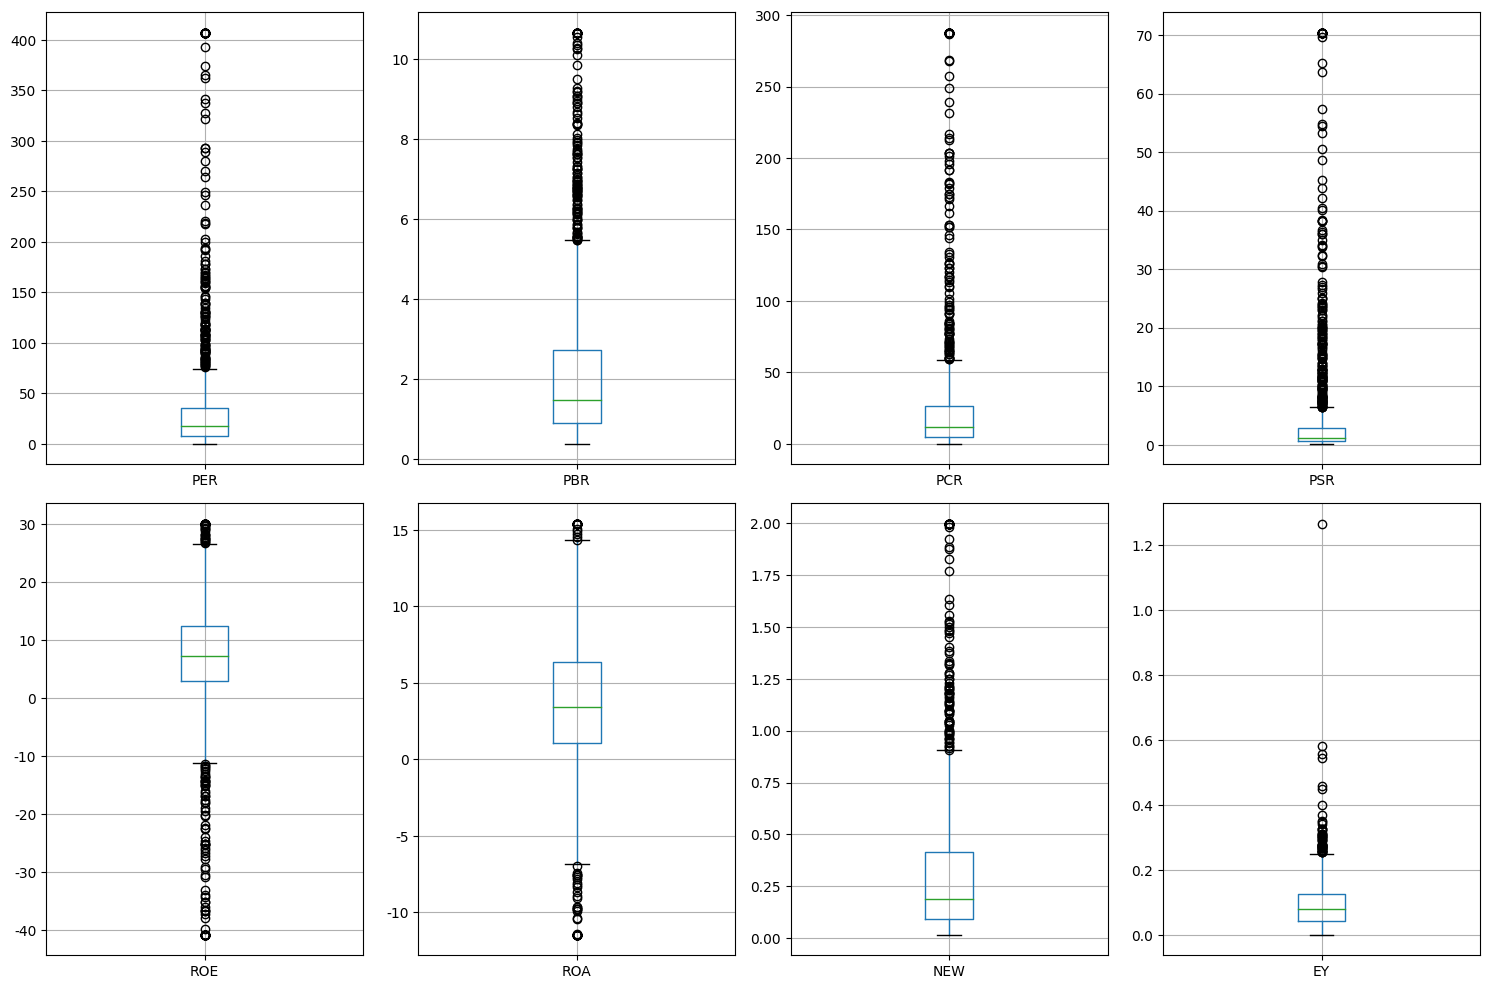

In [171]:
## 윈저라이징 후 박스플롯

import matplotlib.pyplot as plt

kospi_num = kospi_f
kospi_num_col = kospi_f.columns

# 행과 열의 수 계산
n = len(kospi_num_col)
ncols = 4
nrows = n // ncols + (n % ncols > 0)

# 서브플롯 생성
fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows*5))

for i, var in enumerate(kospi_num_col):
    r, c = i // ncols, i % ncols
    ax = axes[r, c]
    kospi_num.boxplot(column=var, ax=ax)

# 빈 서브플롯 제거
if n % ncols > 0:
    for j in range(n % ncols, ncols):
        fig.delaxes(axes[nrows-1, j])

plt.tight_layout()  #  plt.tight_layout() 함수는 서브플롯 간의 간격을 적절하게 조절합니다.
plt.show()

/Users/noseohyeong/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not foun

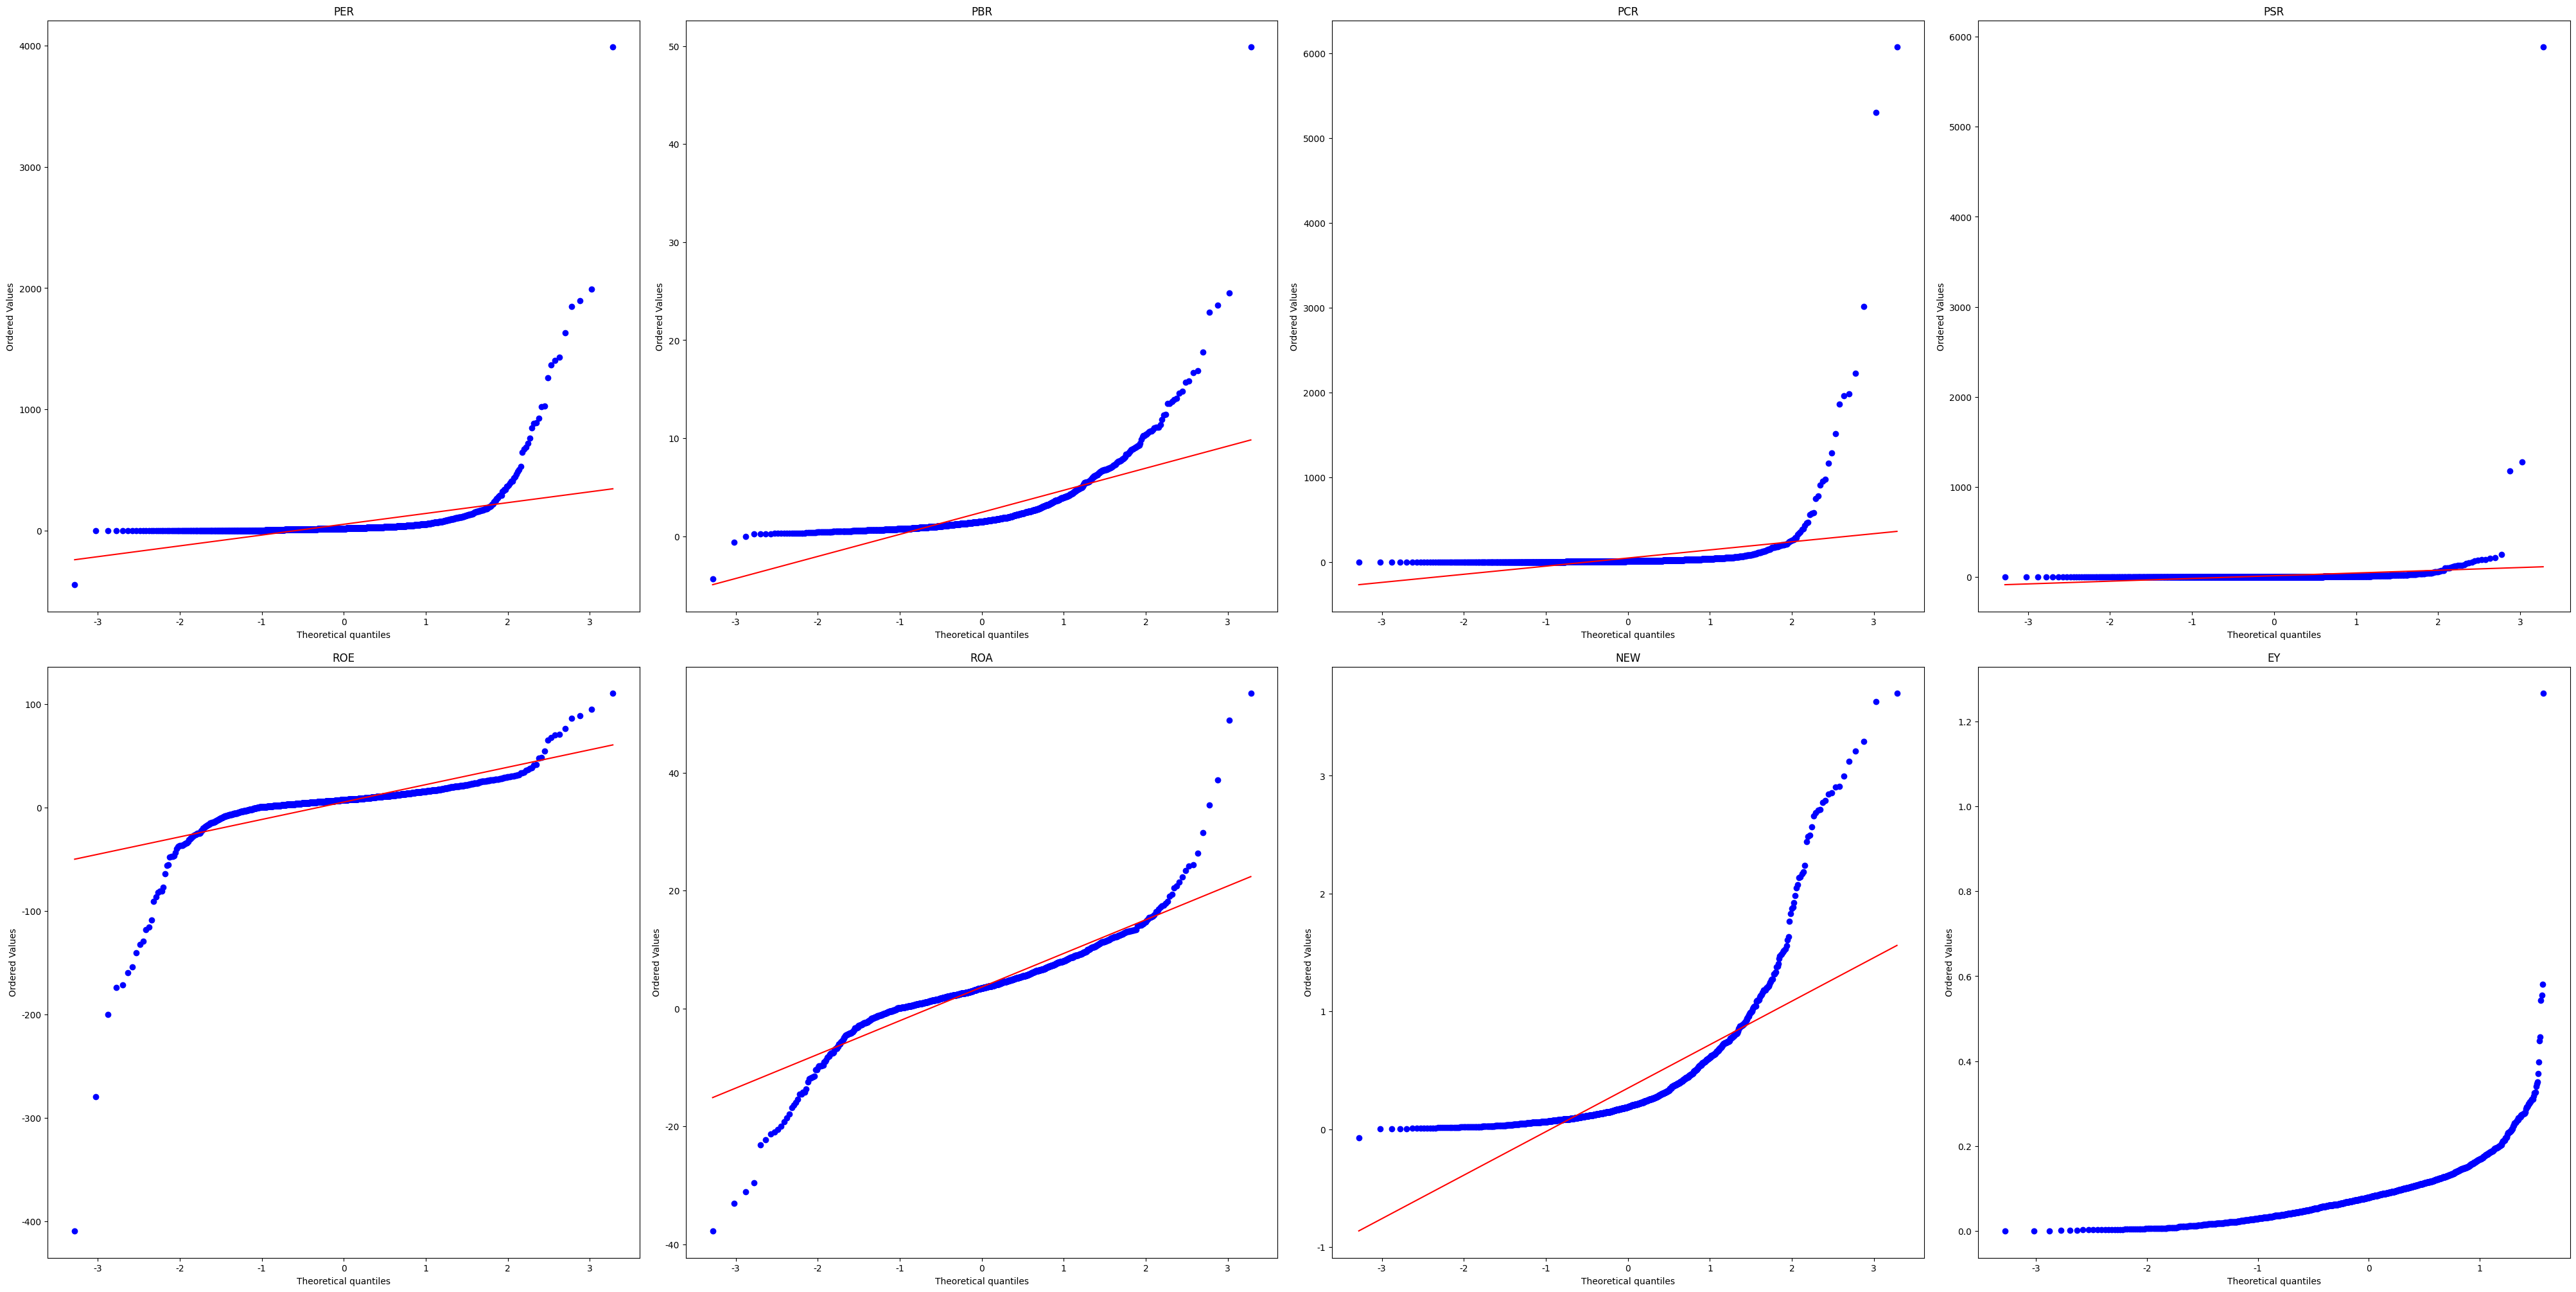

In [172]:
# 윈저라이징 전 qqplot

from scipy import stats

def qqplot(df,ncols,nrows):
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams["font.family"] = 'Malgun Gothic'
   
    fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
    fig.set_size_inches((40, 20))

    for ax, i in zip(axs.ravel(), df):
            stats.probplot(df[i], dist=stats.norm, plot=ax)
            ax.set_title(str(i))

    plt.show()

qqplot(kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "NEW", "EY"]],4,2)

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

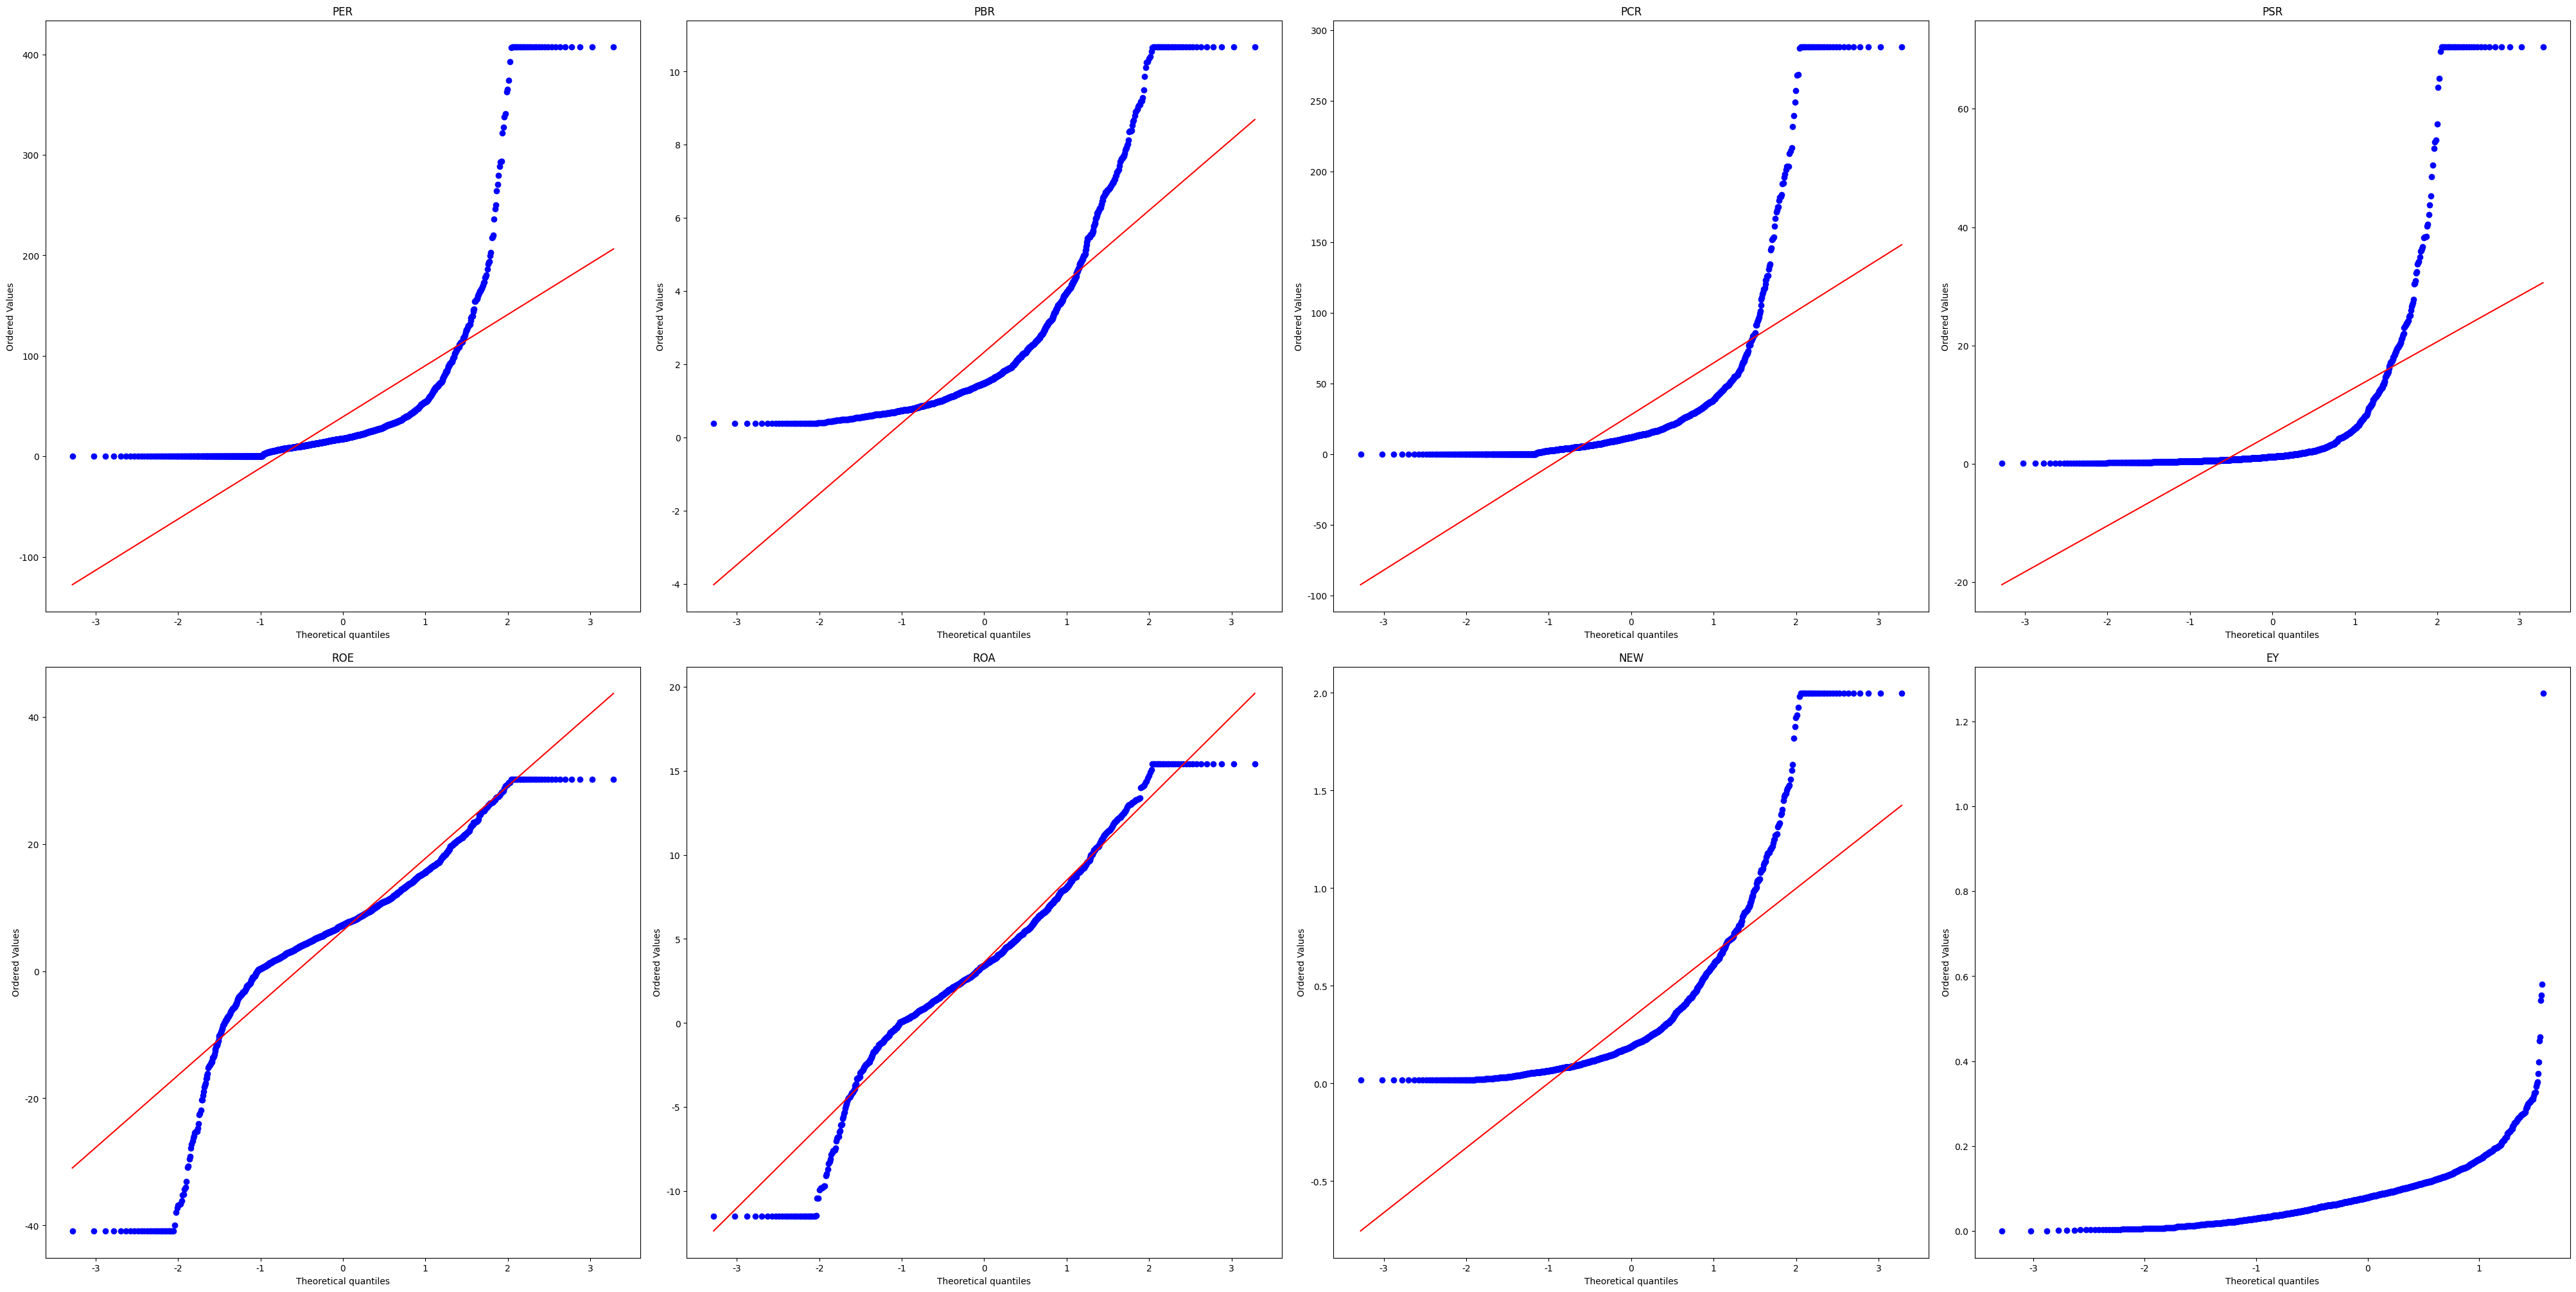

In [173]:
# 윈저라이징 후 qqplot

from scipy import stats

def qqplot(df,ncols,nrows):
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams["font.family"] = 'Malgun Gothic'
   
    fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
    fig.set_size_inches((40, 20))

    for ax, i in zip(axs.ravel(), df):
            stats.probplot(df[i], dist=stats.norm, plot=ax)
            ax.set_title(str(i))

    plt.show()

qqplot(kospi_f, 4, 2)

In [174]:
kospi_f

,PER,PBR,PCR,PSR,ROE,ROA,NEW,EY
0,0.000,3.635,5.695,0.475,-40.8584,-7.819136,0.446111,0.153846
1,4.105,2.150,3.480,0.785,30.1272,12.870986,0.165039,0.195695
2,8.260,2.145,2.945,0.940,29.6500,8.952679,0.166677,0.246305
3,10.395,1.910,4.245,1.140,27.6200,11.084563,0.207305,0.269542
4,7.210,1.360,3.755,1.025,17.1200,8.141211,0.212452,0.268097
...,...,...,...,...,...,...,...,...
1334,15.085,4.550,16.070,2.385,30.1272,11.346144,0.074404,0.034554
1335,9.525,3.070,8.875,2.355,19.1100,5.460103,0.138510,0.069686
1336,10.240,1.375,3.240,0.200,25.1000,5.958373,0.254025,0.103734
1337,9.165,4.770,12.370,0.555,30.1272,15.414540,0.122155,0.149925


In [175]:
kospi_f_col = kospi_f.columns

In [176]:
kospi_f_col

Index(['PER', 'PBR', 'PCR', 'PSR', 'ROE', 'ROA', 'NEW', 'EY'], dtype='object')

In [177]:
kospi_f.isnull().sum()

PER    0
PBR    0
PCR    0
PSR    0
ROE    0
ROA    0
NEW    0
EY     0
dtype: int64

In [178]:
kospi_f[kospi_f_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PER     1339 non-null   float64
 1   PBR     1339 non-null   float64
 2   PCR     1339 non-null   float64
 3   PSR     1339 non-null   float64
 4   ROE     1339 non-null   float64
 5   ROA     1339 non-null   float64
 6   NEW     1339 non-null   float64
 7   EY      1339 non-null   float64
dtypes: float64(8)
memory usage: 83.8 KB


In [183]:
kospi_f_col

Index(['PER', 'PBR', 'PCR', 'PSR', 'ROE', 'ROA', 'NEW', 'EY'], dtype='object')

In [181]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# standard 스케일링
scaler = StandardScaler()
kospi_f[kospi_f_col] = scaler.fit_transform(kospi_f[kospi_f_col])

print(kospi_f.head())

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [ ]:
kospi_f

,PER,PBR,PCR,PSR,ROE,ROA,NEW,EY
0,0.000,3.635,5.695,0.475,-40.8584,-7.819136,0.446111,0.153846
1,4.105,2.150,3.480,0.785,30.1272,12.870986,0.165039,0.195695
2,8.260,2.145,2.945,0.940,29.6500,8.952679,0.166677,0.246305
3,10.395,1.910,4.245,1.140,27.6200,11.084563,0.207305,0.269542
4,7.210,1.360,3.755,1.025,17.1200,8.141211,0.212452,0.268097
...,...,...,...,...,...,...,...,...
1334,15.085,4.550,16.070,2.385,30.1272,11.346144,0.074404,0.034554
1335,9.525,3.070,8.875,2.355,19.1100,5.460103,0.138510,0.069686
1336,10.240,1.375,3.240,0.200,25.1000,5.958373,0.254025,0.103734
1337,9.165,4.770,12.370,0.555,30.1272,15.414540,0.122155,0.149925


In [ ]:
kospi[['PER', "PBR", "PCR", "PSR", "ROA", "NEW", "EY", "ROE"]] = kospi_f[['PER', "PBR", "PCR", "PSR", "ROA", "NEW", "EY", "ROE"]]

In [ ]:
kospi

,회사명,종목코드,회계년도,종가,ROE,상장주식수,시가총액,수익률,PER,PBR,PCR,PSR,ROA,NEW,EY,수정종가
0,DB하이텍,000990,2014,4615.0,-40.8584,44367832.0,2.047575e+11,0.310559,0.000,3.635,5.695,0.475,-7.819136,0.446111,0.153846,6640.0
1,DB하이텍,000990,2015,14300.0,30.1272,44367832.0,6.344600e+11,-1.144578,4.105,2.150,3.480,0.785,12.870986,0.165039,0.195695,5880.0
2,DB하이텍,000990,2016,15900.0,29.6500,44367832.0,7.054485e+11,20.782313,8.260,2.145,2.945,0.940,8.952679,0.166677,0.246305,18100.0
3,DB하이텍,000990,2017,12000.0,27.6200,44367832.0,5.324140e+11,1.243094,10.395,1.910,4.245,1.140,11.084563,0.207305,0.269542,20350.0
4,DB하이텍,000990,2018,10850.0,17.1200,44398588.0,4.817247e+11,-3.046683,7.210,1.360,3.755,1.025,8.141211,0.212452,0.268097,14150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,효성첨단소재,298050,2021,596000.0,30.1272,4479948.0,2.670049e+12,51.001642,15.085,4.550,16.070,2.385,11.346144,0.074404,0.034554,371500.0
1335,효성첨단소재,298050,2022,333500.0,19.1100,4479948.0,1.494063e+12,4.051144,9.525,3.070,8.875,2.355,5.460103,0.138510,0.069686,522000.0
1336,효성티앤씨,298020,2020,211000.0,25.1000,4327682.0,9.131409e+11,-4.189944,10.240,1.375,3.240,0.200,5.958373,0.254025,0.103734,104000.0
1337,효성티앤씨,298020,2021,521000.0,30.1272,4327682.0,2.254722e+12,43.653846,9.165,4.770,12.370,0.555,15.414540,0.122155,0.149925,558000.0


In [ ]:
kospi_PER = kospi[["PER"]]
kospi_f_PER = kospi_f[["PER"]]

In [ ]:
kospi_PER = kospi_PER.loc[kospi_PER.values != 0]

In [ ]:
(kospi_PER.values == 0).sum()

0

In [ ]:
sample_kospi = kospi.loc[~(kospi["PER"] == 0)]
sample_kospi

,회사명,종목코드,회계년도,종가,ROE,상장주식수,시가총액,수익률,PER,PBR,PCR,PSR,ROA,NEW,EY,수정종가
1,DB하이텍,000990,2015,14300.0,30.1272,44367832.0,6.344600e+11,-1.144578,4.105,2.150,3.480,0.785,12.870986,0.165039,0.195695,5880.0
2,DB하이텍,000990,2016,15900.0,29.6500,44367832.0,7.054485e+11,20.782313,8.260,2.145,2.945,0.940,8.952679,0.166677,0.246305,18100.0
3,DB하이텍,000990,2017,12000.0,27.6200,44367832.0,5.324140e+11,1.243094,10.395,1.910,4.245,1.140,11.084563,0.207305,0.269542,20350.0
4,DB하이텍,000990,2018,10850.0,17.1200,44398588.0,4.817247e+11,-3.046683,7.210,1.360,3.755,1.025,8.141211,0.212452,0.268097,14150.0
5,DB하이텍,000990,2019,27600.0,17.4000,44398588.0,1.225401e+12,-0.812721,7.135,1.425,5.375,1.070,9.609513,0.092077,0.186567,13000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,효성첨단소재,298050,2021,596000.0,30.1272,4479948.0,2.670049e+12,51.001642,15.085,4.550,16.070,2.385,11.346144,0.074404,0.034554,371500.0
1335,효성첨단소재,298050,2022,333500.0,19.1100,4479948.0,1.494063e+12,4.051144,9.525,3.070,8.875,2.355,5.460103,0.138510,0.069686,522000.0
1336,효성티앤씨,298020,2020,211000.0,25.1000,4327682.0,9.131409e+11,-4.189944,10.240,1.375,3.240,0.200,5.958373,0.254025,0.103734,104000.0
1337,효성티앤씨,298020,2021,521000.0,30.1272,4327682.0,2.254722e+12,43.653846,9.165,4.770,12.370,0.555,15.414540,0.122155,0.149925,558000.0
